# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#LibraryImport
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import *
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#MemuatDataset
dataset = pd.read_csv("Dataset_inisiasi.csv")
print(dataset.head())

   TransactionAmount  CustomerAge CustomerOccupation  LoginAttempts  \
0              14.09           70             Doctor              1   
1             376.24           68             Doctor              1   
2             126.29           19            Student              1   
3             184.50           26            Student              1   
4              13.45           26            Student              1   

   AccountBalance  Cluster  
0         5112.21        0  
1        13758.91        2  
2         1122.35        1  
3         8569.06        0  
4         7429.40        0  


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
#DataSplitting: AccountBalance and LoginAttempts
X = dataset[["AccountBalance", "CustomerAge"]]
y = dataset["Cluster"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training-data size: {X_train.shape}, Test-data size: {X_test.shape}")

Training-data size: (1597, 2), Test-data size: (685, 2)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
#LogisticRegression
model = LogisticRegression(random_state=40, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Penjelasan Algoritma Logisctic Regression**

Logistic Regression merupakan model klasifikasi biner atau multikelas yang sederhana dan mudah dipahami. Model ini mempelajari hubungan linear antara fitur dan target menggunakan fungsi logistik.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [5]:
#EvaluasiModel
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("Classification:")
print(classification_report(y_test, y_pred))

Accuracy: 0.999
Classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       335
           2       0.99      1.00      1.00       105

    accuracy                           1.00       685
   macro avg       1.00      1.00      1.00       685
weighted avg       1.00      1.00      1.00       685



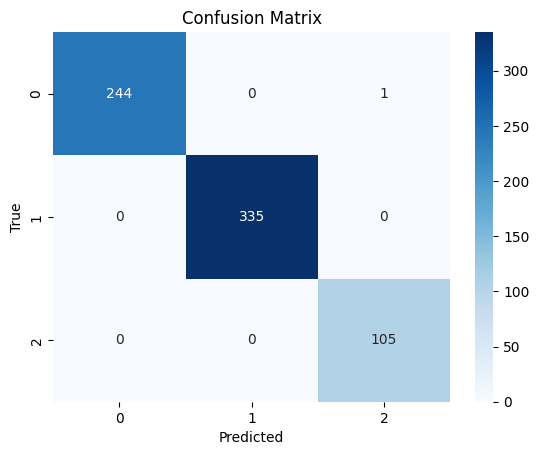

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Hanya menggunakan Logistic Regression untuk algoritmanya. Hasil evaluasi:

**score accuracy** menunjuk pada angka **0.99** atau **99%** yang menandakan semua prediksi dibuat model adalah benar, atau model dapat memprediksi dengan akurat dari data yang digunakan. Pada confussion matrix, tidak dijumpai **nilai negatif** menandakan sudah baik dalam memprediksi.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [7]:
#GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=40), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best-Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

Best-Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.9981210815047022


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [8]:
#EvaluasiModelTuning
best_rf_model = grid_search.best_estimator_
y_pred_after_tuning = best_rf_model.predict(X_test)
accuracy_after_tuning = accuracy_score(y_test, y_pred_after_tuning)
print(f"Accuracy setelah tuning: {accuracy_after_tuning}")

Accuracy setelah tuning: 0.9985401459854014


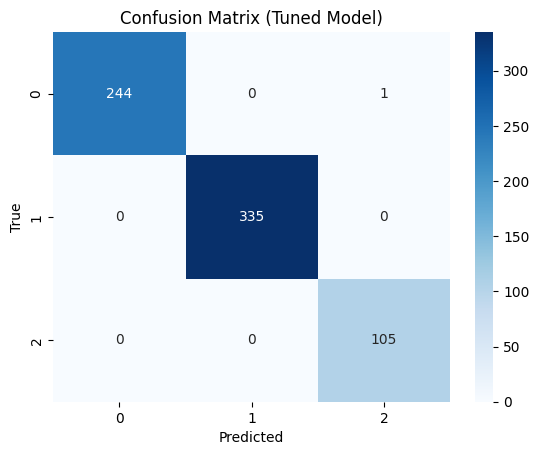

In [9]:
#ConfussionMatrix
cm_best = confusion_matrix(y_test, y_pred_after_tuning)
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

In [10]:
#Before vs After Tuning
print("Classification Report Before-Tuning:")
print(classification_report(y_test, y_pred))
print("\nClassification Report After-Tuning:")
print(classification_report(y_test, y_pred_after_tuning))

Classification Report Before-Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       335
           2       0.99      1.00      1.00       105

    accuracy                           1.00       685
   macro avg       1.00      1.00      1.00       685
weighted avg       1.00      1.00      1.00       685


Classification Report After-Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       335
           2       0.99      1.00      1.00       105

    accuracy                           1.00       685
   macro avg       1.00      1.00      1.00       685
weighted avg       1.00      1.00      1.00       685



**score accuracy** menunjuk pada angka **0.98 yang menandakan semua prediksi dibuat model adalah benar, atau model dapat memprediksi dengan akurat dari data yang digunakan. Pada confussion matrix, tidak dijumpai **nilai negatif** dan hasil true terlihat menandakan sudah baik dalam memprediksi.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
**Sebelum Tuning** akurasi model pada 0.99 yang menunjukan model cukup akurat untuk memprediksi data uji. **Setelah tuning** akurasi turun menjadi 0.98 tetapi best-cross-validation 1.0 menunjukan model ini mampu memberikan hasil sempurna (100%) selama cross-validation dan menjadikan model ini lebih stabil.

2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?

  **Sebelum Tuning** precision atau recall memiliki rata-rata 1.0, namun ada pada cluster kedua 0.99, rata-rata tersebut sudah baik karena mendekati 1.0. **Setelah Tuning** didapatkan rata-rata sama, yakni 1.0 dan cluster kedua tetap 0.9, menandakan sudah sangat baik namun tidak mengalami peningkatan(nilai merata).

  **Model sebelum tuning dikatakan tidak mengalami overfitting karena akurasi model 0.99 (mendekati 1.0) diseluruh kelas. Model setelah tuning cenderung overfitting karena akurasi model menurun menjadi 0.98.**

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Rekomendasi tindakan lanjutan, bisa diterapkan algoritma lain seperti Gradient Boosting untuk meningkatkan performa model (tetapi hasil dari logistic regression sudah sangat baik), namun model ini cocok untuk pola kompleks.

**Kaitan dengan Cluster(Data Splitting) yakni score atau accuracy yang tinggi menunjukan bahwa accountbalance dan customerage merupakan variabel yang relevan dalam memprediksi cluster dan juga mempengaruhi pembagian dalam cluster.**